In [36]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
sheet = pd.read_excel(file, sheet_name='Tumor')
sheet1 = pd.read_excel(file, sheet_name='Global')

In [ ]:
sheet.equals(sheet1)

In [37]:
def buildTree(file, cell_types_per_level, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            if current_depth in cell_types_per_level:
                cell_types_per_level[current_depth].append(i)
            else:
                cell_types_per_level[current_depth] = [i]
            buildTree(file, cell_types_per_level, i, sheet_names, depth, current_depth+1)

In [38]:
def buildTree_from_file(file, depth):
    cell_types_per_level = {}
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    cell_types_per_level[0] = sheet_names[0]
    buildTree(file, cell_types_per_level, sheet_names[0], sheet_names, depth, 1)
    return cell_types_per_level

In [39]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
cell_types_per_level = {}
cell_types_per_level = buildTree_from_file(file, 3)

In [40]:
cell_types_per_level

{0: 'Global',
 1: ['Tumor', 'Myeloid', 'Lymphoid', 'Stromal'],
 2: ['Mesenchymal',
  'EMT',
  'CD163+ Macrophage',
  'Neutrophils',
  'B cells',
  'CD4 T cells',
  'Epithelial stromal',
  'Endothelial',
  'Mesenchymal stroma']}

In [41]:
def buildTree1(file, graph, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            graph.add_edge(sheet_name, i)
            buildTree1(file, graph, i, sheet_names, depth, current_depth+1)

In [42]:
def buildTree_from_file1(file, depth):
    graph = nx.DiGraph()
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    graph.add_node(sheet_names[0])
    buildTree1(file, graph, sheet_names[0], sheet_names, depth, 1)
    return graph

In [43]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
graph = buildTree_from_file1(file, 3)

In [44]:
import networkx as nx
import random
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

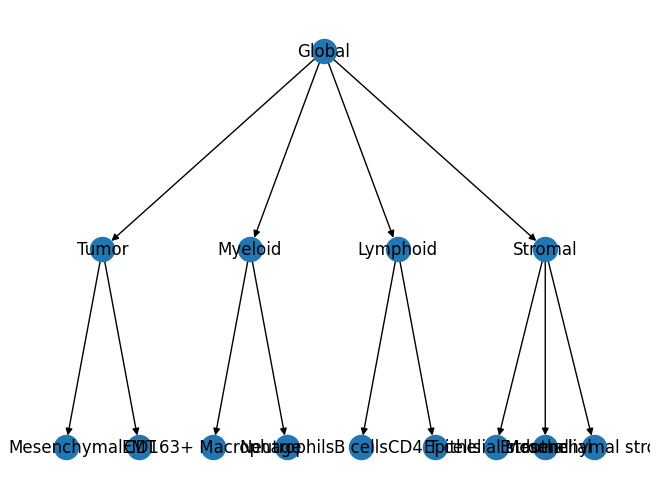

In [45]:
pos = hierarchy_pos(graph, "Global", vert_gap=0.5)
nx.draw(graph, pos=pos, with_labels=True)

In [50]:
def graph_traversal(graph, node):
    if 1<2: #if the cell type description is the same
        # TODO save the data
        print(node)
        out_edges = graph.out_edges(node)
        for i, j in out_edges:
            graph_traversal(graph, j)

In [51]:
graph_traversal(graph, 'Global')

Global
Tumor
Mesenchymal
EMT
Myeloid
CD163+ Macrophage
Neutrophils
Lymphoid
B cells
CD4 T cells
Stromal
Epithelial stromal
Endothelial
Mesenchymal stroma
